## 변이형 오토인코더(Variational AutoEncoders, VAE)를 사용한 이미지 생성
- 이미지 생성 모델
  - Latent visual space를 학습하고 이 공간에서 샘플링하여 실제 사진에서 보간된 완전히 새로운 이미지를 생성
  - 이미지 뿐만 아니라 소리, 음악, 텍스트 등의 latent space 생성 가능

### 이미지의 잠재 공간에서 샘플링하기
- 각 포인트가 실제와 같은 이미지로 매핑될 수 있는 저차원 잠재 공간(벡터 공간)의 표현을 생성하는 것
- GAN Generator / VAE Decoder
  - Latent space의 한 포인트를 입력으로 받아 이미지를 출력하는 모듈
- 이미지 생성 flow
  - Latent space 학습 후, 포인트 하나를 sampling
  - 해당 포인트를 이미지 공간으로 매핑
- 잠재 공간 표현을 학습하는 전략
  - VAE : 구조적인 잠재 공간을 학습하는데 좋음
    - 특정 방향은 데이터에서 의미 있는 변화의 방향(Concept vector)을 인코딩
  - GAN : 매우 실제 같은 이미지를 생성
    - 구조적이거나 연속성인 잠재 공간을 만들지 못함

### 이미지 변형을 위한 개념 벡터(Concept vector)
- Latent space나 embedding space가 주어지면 해당 공간의 어떤 ㅂ방향은 원본 데이터의 흥미로운 변화를 인코딩한 축일 수 있음
- 이미지 공간에서 독립적으로 변화가 일어나는 모든 차원이 개념 벡터임

**Latent space vs embedding space vs hypothesis space (feat. manifold and interpolation)**  
- Latent Space는 Manifold를 표현하는 공간
- Embedding Space는 유사성을 비교하는 공간
- Hypothesis Space는 모델이 학습할 수 있는 함수들의 공간
- Manifold는 실제 데이터가 분포하는 구조적 공간
- 각 공간이 연속적이면 개념적인 거리를 사용할 수 있고 보간을 통해 새로운 포인트를 생성하거나 분류할 수 있음

### 변이형 오토인코더
- 초기 오토인코더
  - 입력을 저차원 잠재 공간으로 인코딩한 후 디코딩하여 복원
  - 입력 이미지와 동일한 이미지를 타겟 데이터로 사용하여 훈련
    - 원본 입력을 재구성하는 방법을 학습
  - Coding(인코더의 출력)에 제약을 가해서 더/덜 흥미로운 잠재 공간 표현을 학습하도록 학습
    - 코딩이 저차원이거나 Sparsity를 가지도록(0이 많도록) 제약 -> 입력 데이터의 정보를 적은 수의 비트에 압축하기 위해 노력
  - 근데 성능이 그렇게 좋지 않아

- VAE (Variatioinal AutoEncoder)
  - 딥러닝 + Bayesian inference 아이디어 혼합
  - 오토인코더에 약간의 통계 기법을 추가
  - 연속적이고 구조적인 잠재 공간 학습
  - 입력 이미지를 어떤 통계 분포의 파라미터로 변환
    - 입력 이미지가 통계적 과정을 통해 생성되었다 가정, 인코딩과 디코딩에 무작위성이 필요
    - 무작위 : 안정성을 향상, 잠재 공간 어디서든 의미 있는 표현을 인코딩하도록 함
  - 평균과 분산 파라미터를 사용하여 해당 분포에서 랜덤하게 하나의 샘플을 추출
  - 그리고 그 샘플을 디코딩하여 복원

**Loss function**  
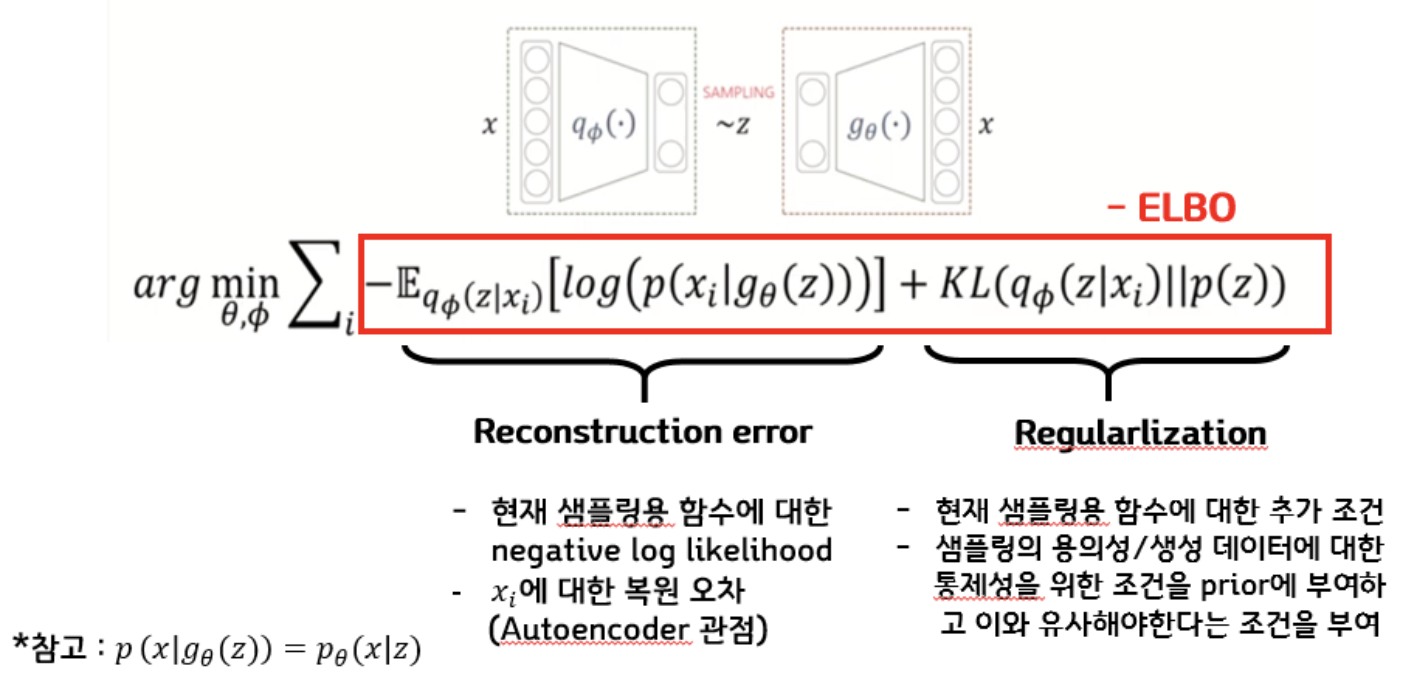
- Reconstruction loss : Decoder가 입력을 잘 복원하도록 학습
  - p(x∣z): Decoder(z)가 생성한 복원된 데이터의 확률 분포
  - q(z∣x): Encoder(x)가 학습한 잠재 변수 z의 분포
  - MSE (Mean Squared Error) 또는 Binary Cross-Entropy를 사용
  - 입력 데이터 x를 보고 z를 통해 복원했을 때, 출력된 데이터가 원본과 얼마나 가까운지를 측정
- Regularization loss : Encoder가 적절한 z 값을 만들도록 학습
  - 잠재 변수 z 가 특정한 확률 분포(보통 정규분포)와 유사하도록 강제하는 정규화 과정
  - z 값들이 너무 특정한 한 지점에 몰리지 않도록 overfitting 방지
  - q(z∣x) = Encoder(x)가 학습한 잠재 변수 분포 (μ,σ)
  - p(z) = 정규분포 N(0,1) (VAE가 학습하고 싶은 이상적인 분포)
  - KL Divergence는 두 확률 분포 간 차이를 측정하는 함수
- 참고
  - [VAE](https://lilianweng.github.io/posts/2018-08-12-vae/)
  - [Auto-Encoding Variational Bayes 논문 정리(2)](https://di-bigdata-study.tistory.com/5)


### 케라스로 VAE 구현하기
- Stochastic term이 있으면 backpropagation이 안됨
![reparameterization trick](https://i.sstatic.net/TzX3I.png)
- Random node인 z를 deterministic node와 random node로 분리
  - Stochastic term을 분리하니 이제 backpropagation을 할 수 있겠군
  - epsilon은 정규 분포를 따르는 random vector batch
- 참고
  - [How does the reparameterization trick for VAEs work and why is it important?](https://stats.stackexchange.com/questions/199605/how-does-the-reparameterization-trick-for-vaes-work-and-why-is-it-important)

- Reconstruction Loss만 있다면?
  - 원래 입력을 잘 복원 가능
  - 새로운 데이터 생성은 제대로 안 됨 -> 창의성이 부족
  - 잠재 공간이 의미 없는 구조가 됨 (Overfitting)
  - 잠재 공간(latent space)이 무질서 -> 비슷한 데이터끼리 가까운 위치에 있지 않음 -> 보간이 제대로 안됨
- KL Divergence Loss만 있다면?
  - 잠재 공간이 정규분포를 따름 -> 샘플링이 자연스러움
  - 입력을 제대로 복원하지 못 함

**VAE 인코더 네트워크**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

In [2]:
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 14, 14, 32)     │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 7, 7, 64)       │         18,496 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 3136)           │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 16)             │         50,192 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │             34 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │             34 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

**잠재 공간 샘플링 층**

In [3]:
import tensorflow as tf

class Sampler(layers.Layer):
    def call(self, z_mean, z_log_var):
        batch_size = tf.shape(z_mean)[0]
        z_size = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch_size, z_size))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

**잠재 공간 포인트를 이미지로 매핑하는 VAE 디코더 네트워크**

In [4]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

In [5]:
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3136)                │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

**사용자 정의 `train_step()` 메서드를 사용하는 VAE 모델**

In [6]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampler(z_mean, z_log_var)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

**VAE 훈련**

In [7]:
import numpy as np

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)
vae.fit(mnist_digits, epochs=30, batch_size=128)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 80s 138ms/step - kl_loss: 1.8336 - reconstruction_loss: 250.5378 - total_loss: 252.3714
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 72s 128ms/step - kl_loss: 2.7780 - reconstruction_loss: 165.3910 - total_loss: 168.1689
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 68s 125ms/step - kl_loss: 3.0467 - reconstruction_loss: 158.0319 - total_loss: 161.0787
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 68s 124ms/step - kl_loss: 3.1677 - reconstruction_loss: 154.0073 - total_loss: 157.1750
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 83s 126ms/step - kl_loss: 3.2246 - reconstruction_loss: 152.0927 - total_loss: 155.3173
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - kl_loss: 3.2878 - reconstruction_loss: 150.4872 - total_loss: 153.7750
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - kl_loss: 3.3147 - reconstruction_loss: 149.2568 - total_loss: 152.5714
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/ste

**잠재 공간에서 이미지 그리드를 샘플링하기**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

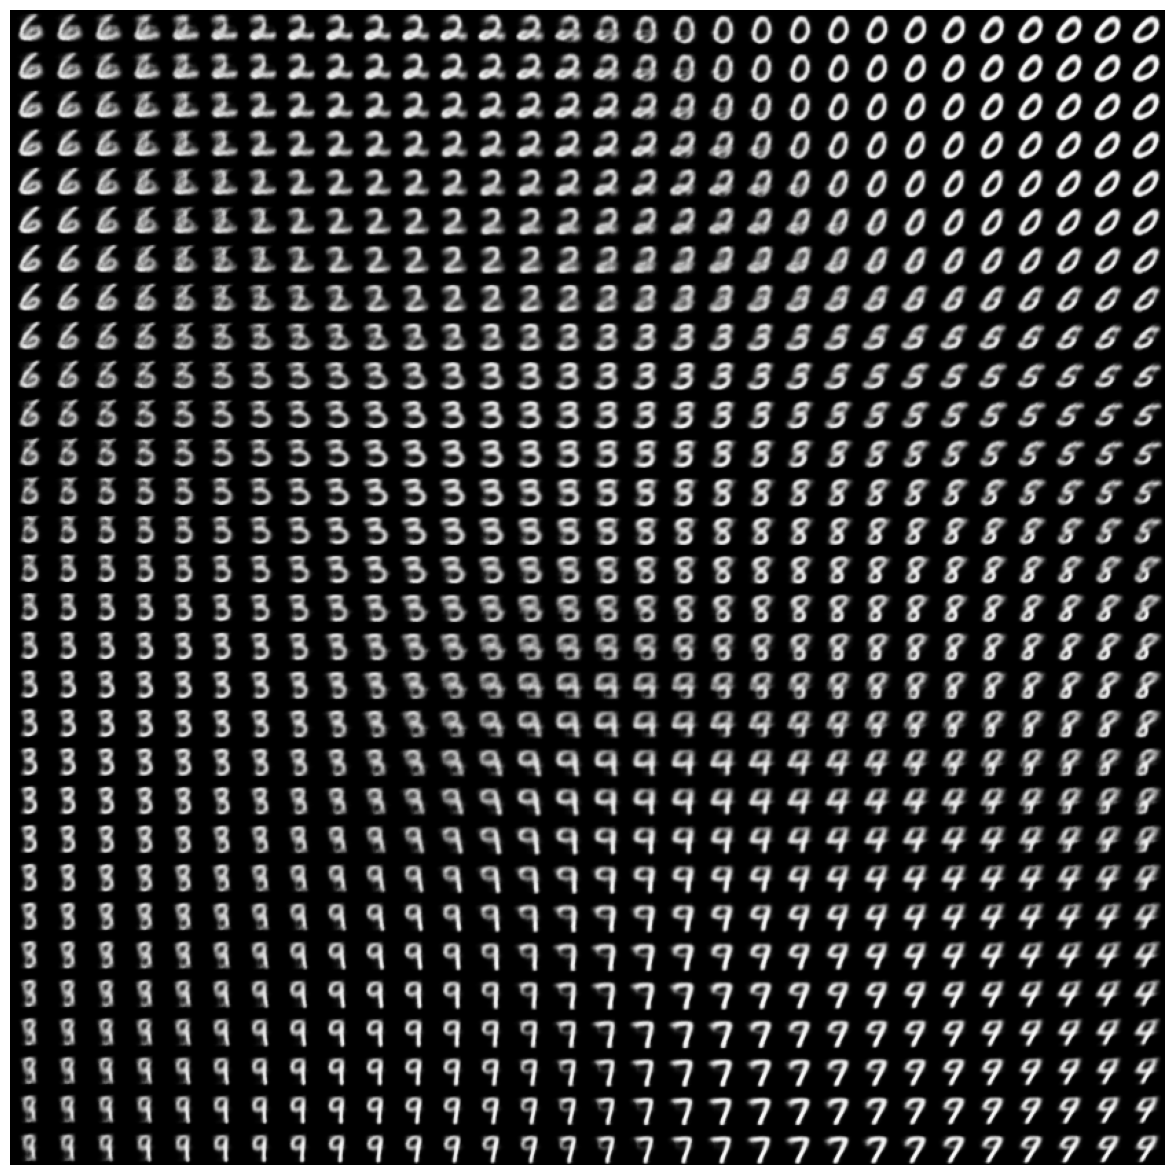

In [8]:
import matplotlib.pyplot as plt

n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-1, 1, n)
grid_y = np.linspace(-1, 1, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
        ] = digit

plt.figure(figsize=(15, 15))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.axis("off")
plt.imshow(figure, cmap="Greys_r")
plt.show()

### 정리